# Prediksi Customer Churn

# Pendahuluan

Keberadaan pelanggan bagi sebuah
perusahaan sangat vital. Pelanggan adalah
konsumen yang akan menggunakan jasa atau
produk yang ditawarkan dan dijual. Tanpa
keberadaan pelanggan, sebuah perusahaan tidak
akan mendapatkan keuntungan yang menjadi
sebuah tujuan utama dibangunnya sebuah
bisnis. Untuk mendapatkan pelanggan,
perusahaan perlu melakukan promosi agar
produk atau jasa yang ditawarkan dapat dikenal
secara luas oleh masyarakat.

Setelah mendapatkan pelanggan sesuai yang
diharapkan, ada masalah
lain yang harus dihadapi, yakni apakah
pelanggan tersebut loyal atau memilih Churn. Customer Churn
didefinisikan sebagai kecenderungan pelanggan
untuk berhenti melakukan bisnis dengan sebuah
perusahaan. Hal ini telah menjadi isu penting
yang merupakan salah satu tantangan utama
oleh banyak perusahaan di era global ini dan
harus dihadapinya. Berdasarkan transaksi yang
ada dapat dilakukan analisa untuk mencari pola
apakah pelanggan akan setia dengan perusahaan
atau tidak. 

mendapatkan pelanggan baru jauh lebih
sulit dibandingkan dengan mempertahankan
pelanggan lama, serta biaya yang
dikeluarkan perusahaan lima kali lipat lebih
banyak dibandingkan dengan memuaskan dan
mempertahankan pelanggan lama. Oleh karena
itu perlu dilakukan prediksi tentang customer
akan loyal atau tidak. Hal ini dapat bermanfaat
bagi perusahaan dalam menentukan kebijakan
apa yang akan diambil, seperti langkah promosi
yang efektif. 

Disini saya akan membuat model prediksi apakah customer akan churn atau tidak. Model yang akan saya gunakan disini adalah model linear dan non-linear. saya akan memilih model akhir dari segi keoptimalan dalam memprediksi serta kecepatan pemprosesan. 

## Library yang digunakan
Library yang saya gunakan di notebook ini adalah sebagai berikut :


*   **Pengolahan dan Pemprosesan data** : Numpy, Pandas
*   **Visualisasi Data** : Seaborn, Matplotlib
*   **Modelling** : Scikit-learn, Lightgbm 
*   **Utility** : imblearn,scikit-optimize,pickle,request






In [1]:
import requests
import pickle

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PowerTransformer,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

try:
  from imblearn.pipeline import Pipeline
  from imblearn.under_sampling import RandomUnderSampler

except:
  !pip install imblearn
  from imblearn.pipeline import Pipeline
  from imblearn.under_sampling import RandomUnderSampler

try:
  from lightgbm import LGBMClassifier
  from xgboost import XGBClassifier

except:
  !pip install lightgbm
  !pip install xgboost
  from lightgbm import LGBMClassifier
  from xgboost import XGBClassifier

try:
  from skopt import BayesSearchCV
  from skopt.space import Real, Categorical, Integer 
    
except:
  !pip install scikit-optimize
  from skopt import BayesSearchCV
  from skopt.space import Real, Categorical, Integer


    

     |████████████████████████████████| 100 kB 7.2 MB/s 


# Datasets Overview 

 Dataset yang digunakan untuk kasus ini adalah dataset yang didapatkan dari situs kaggle. Data ini berisi mengenai informasi pelanggan dari perusahaan telekomunikasi.

 perlu diketahui bahwa dataset ini bukan merupakan data real dari perusahaan, melainkan data sample yang dibuat oleh IBM, hal ini dikarenakan sulit untuk mencari data real dari suatu perusahaan. Meskipun demikian, kita bisa mendapat gambaran bagaimana cara membuat model untuk memprediksi churn.

 dataset ini memiliki total 7043 baris dan total 20 kolom dengan 1 kolom bernama Churn sebagai targetnya.    

## Nomenklatur Datasets

* Pelanggan yang Churn – kolom ini bernama Churn

* Layanan yang digunakan oleh pelanggan – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Informasi mengenai pelanggan – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demografi dari pelanggan – gender, age range, and if they have partners and dependents

## Import Datasets

In [2]:
df = pd.read_csv("/content/drive/MyDrive/belajar python/case study/studi kasus/churn prediction/data.csv",index_col = 0 )
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Shape

Dataset ini memiliki total 7043 Baris dan 20 kolom, dengan 19 sebagai fitur, dan 1 sebagai target

In [3]:
df.shape

(7043, 20)

## Dataset Info

dataset ini memiliki 17 fitur categorical dan 3 fitur numerical.   

jika dilihat dari df.info() data ini tidak memiliki missing value, tetapi mungkin saja nilai nan pada data ini sudah diganti dengan value lain.

ada fitur yang memiliki tipe data yang salah, yakni pada fitur Total Charges yang seharusnya numeric, tetapi di data ini memiliki tipe categorical.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

# Exploratory Data Analysis (EDA)


Hasil EDA mengenai target class:
* target memiliki 2 class, yakni "yes" dan "no" yang nantinya akan diubah menjadi 1 untuk "yes" dan 0 untuk "no".
* proporsi target class tidak seimbang atau imbalanced, oleh karena diperlukan suatu sampling untuk menyeimbangkan proporsi dari target class
* karena class ini imbalance maka saya akan menggunakan metric F1 Score. 

Hasil EDA mengenai Categorical Data adalah sebagai berikut :
*   data ini memiliki jumlah fitur categorical sebanyak 15 fitur.
* setiap kategori dalam masing masing fitur memiliki proporsi yang berbeda dengan target. 
* categorical fitur ini memerlukan preprocessing seperti label encoder agar bisa diproses oleh model. 

Hasil EDA mengenai Numerical data adalah sebagai berikut:
*   data ini memiliki jumlah fitur numerical sebanyak 4 fitur.
*   beberapa fitur memiliki bentuk distribusi yang berbeda pada tiap targetnya. fitur inilah yang memungkinkan sebagai fitur yang baik dalam mengklasifikasikan target.
* Skala dari tiap fitur berbeda-beda, oleh karena itu diperlukan scaling untuk model linear. 

Hasil EDA mengenai korelasi antar fitur: 
*    dengan menggunakan korelasi spearman, ada 1 pasangan fitur yang memiliki korelasi yang kuat yaitu fitur "pday" dan "previous".Oleh karena itu saya akan membuang fitur "pday" karena korelasinya kuat.  







## Change type Total Charges

karena tipe data total charges seharusnya adalah numerical, maka saya akan mengubah tipe data tersebut.

In [5]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors = "coerce") 

## Target Proportion

dari grafik dapat dilihat bahwa target memiliki proporsi yang tidak seimbang atau imbalanced data dengan proporsi "no" sebanyak 73% dan "yes" sebanyak 27%. Oleh karena itu metric yang cocok untuk digunakan adalah F1 Score.

Selain itu, saya akan mencoba teknik undersampling dan oversampling untuk mengatasi imbalanced data ini.
  

Text(0.5, 1.0, 'proporsi target class ')

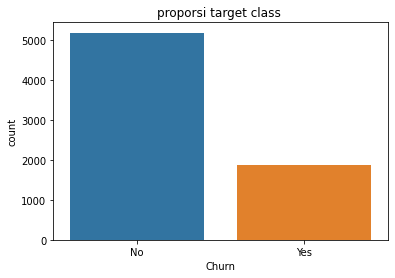

In [6]:
sns.countplot(x = "Churn",data = df)
plt.title("proporsi target class ")

In [7]:
df.Churn.value_counts(normalize = False)

No     5174
Yes    1869
Name: Churn, dtype: int64

## Categorical Data

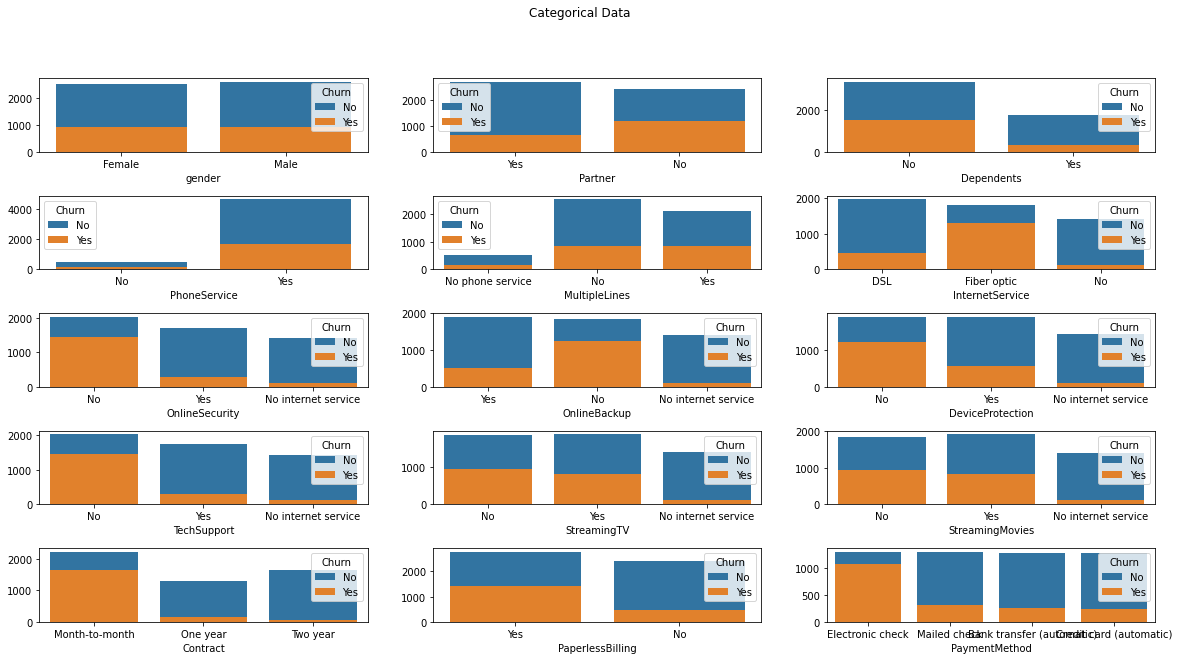

In [8]:
#plot categorical Data (classification Task)
categorical = df.drop("Churn",axis = 1).select_dtypes(include=["object"]).columns

fig, axes = plt.subplots(5, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.6, wspace=0.2)
fig.suptitle('Categorical Data')
row = 0
cols = 0
for item in categorical: 
    sns.countplot(x=item, hue="Churn", data=df, ax=axes[row][cols],dodge = False).set_ylabel("")
    cols += 1
    if cols == 3:
        cols = 0
        row += 1

dari grafik diatas dapat dilihat bahwa ktia mempunyai total 15 fitur categorical, dimana masing masing fitur memiliki jumlah unique yang berbeda beda.

pada fitur 'gender', 'partner', 'Dependent', 'PhoneService', dan 'paperlessBilling' memiliki jumlah nilai unique sebanyak 2, yakni 'yes' dan 'no'. Sedangkan pada fitur 'PaymentMethod', terdapat 4 nilai unique. dan sisanya memiliki 3 nilai unique yang berbeda beda.

ada beberapa fitur yang memiliki proporsi yang berbeda dengan target pada masing masing valuenya. Contohnya adalah fitur 'DeviceProtection', 'Online security','OnlineBackup', dan 'TechSupport' pada value 'no' memiliki proporsi "yes" yang lebih besar daripada nilai lainnya.

## Numerical Data 

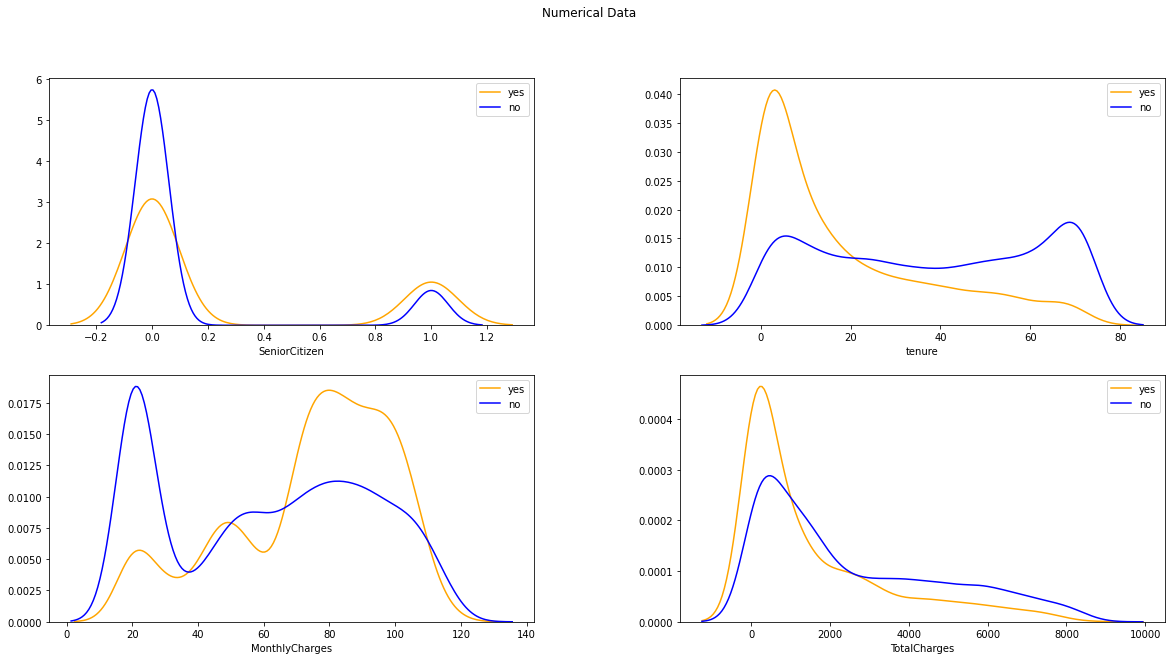

In [9]:
#fungsi untuk plotting
def plot_kde(data,start,end,row_num,col_num):
    df_set_pos = data[data["Churn"] == "Yes"].drop("Churn",axis = 1)
    df_set_neg = data[data["Churn"] == "No"].drop("Churn",axis = 1)
    df_set_pos = df_set_pos.iloc[:,start:end+1]
    df_set_neg = df_set_neg.iloc[:,start:end +1]
    #plot numerical data (Classification Task)
    numerical = df_set_pos.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(row_num,col_num,figsize = (20,10))
    fig.subplots_adjust(hspace=0.2, wspace=0.3)
    fig.suptitle('Numerical Data')
    row = 0
    cols = 0

    for item in numerical:
        if cols > col_num -1:
            cols = 0
            row += 1
        ax1 = sns.kdeplot(x = item,data = df_set_pos,ax = axes[row,cols],color = "orange" ,label = "yes")
        ax2 = sns.kdeplot(x = item,data = df_set_neg,ax = axes[row,cols],color = "blue" ,label = "no")
        ax1.legend()
        ax1.set_ylabel("")
        ax2.set_ylabel("")
        cols += 1

plot_kde(df,0,20,2,2)

pada grafik bisa dilihat bahwa dataset ini memiliki 4 fitur numerical. namun ada satu fitur yang ternayta merupakan fitur categorical, yakni Senior Citizen. karena fitur ini sudah di encode menjadi numeric, maka kita tidak perlu melakukan encode lagi di fitur ini.  

## Correlation Matrix

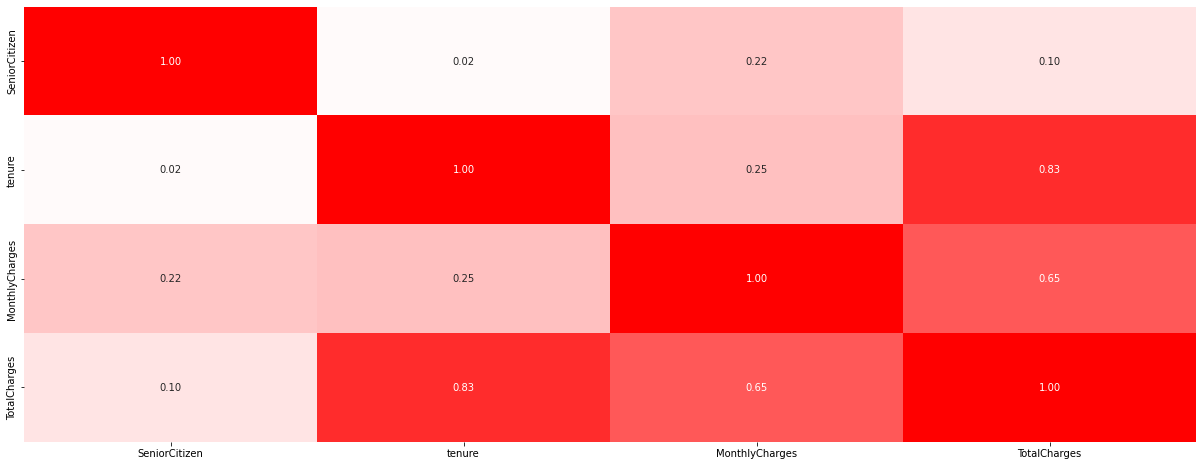

In [10]:
plt.figure(figsize = (21,8))
sns.heatmap(df.corr(method="pearson"),cmap = "bwr" ,vmin = -1,vmax=1,annot = True,cbar = False,fmt = ".2f")

Heatmap Correlation Matrix diatas dapat dilihat bahwa 'TotalCharges' memiliki korelasi yang cukup kuat dengan fitur 'tenure', dan 'MonthlyCharges'.

untuk memutuskan apakah fitur ini akan dibuang atau tidak, saya akan menyeleksi fitur ini di bagian Feature Selection.

# Data Cleaning 

pada section ini saya akan menghapus fitur yang memiliki terlalu banyak missing values. Untuk proses imputasi, saya akan melakukan pada proses preprocessing karena saya akan membuat imputasi menjadi sebuah pipeline.

## Plot Missing Value
plot ini berguna untuk melihat fitur mana saja yang memiliki missing value. Kita juga bisa melihat seberapa besar missing value tersebut.

<Figure size 720x432 with 0 Axes>

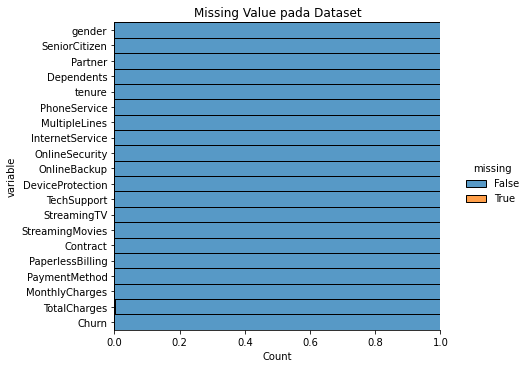

In [11]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.3
)
plt.title("Missing Value pada Dataset");

pada plot diatas dapat dilihat bahwa hanya 1 fitur saja yang memiliki missing value, itupun hanya sedikit. Oleh karena itu saya akan melakukan imputasi pada fitur tersebut.

## Mengubah target class

karena secara default target atau fitur 'Churn' memiliki nilai "yes" dan  "no". Oleh karena itu saya akan mengubah menjadi 1 untuk "yes" dan 0 untuk "no". Hal ini saya lakukan karena model hanya bisa menerima nilai yang berupa angka.

In [12]:
df["Churn"] = df.Churn.apply(lambda x: 1 if x == "Yes" else 0)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


# Modelling Plan

1. Prepare Data for Modelling
> sebelum melakukan modelling saya akan membagi data saya menjadi 2 bagian, yakni train dan juga test, data train ini akan saya gunakan untuk training dan validasi model, sedangkan data test akan saya gunakan untuk akhir evaluasi pada model.

2. Preprocessing
> tahapan preprocessing ini akan saya masukkan ke dalam pipeline, sehingga akan lebih mudah untuk digunakan pada saat training dan juga deployment. Preprocessing yang akan saya gunakan antara lain : 
> * Undersampling data.
> * Data Transformation.
> * Data imputation.
> * Label Encoder.   
3. Model Training
> saya akan menggunakan berbagai model, baik model linear maupun non-linear. Model yang akan saya gunakan antara lain,
> 
> Model Linear :Logistic Regression, SVM  
> Model Non-Linear : Random Forest, XGBoost, LGBoost 
4. Model Selection
> selanjutnya saya akan memilih model mana yang memiliki CV Score tertinggi dengan metric F1 Score.
5. Model Tuning
> Selanjutnya kita akan melakukan hyperparameter tuning yang diharapkan bisa meningkatkan score dari model.
6. Model Evaluation.
> Untuk melihat bagaimana score model dalam meprediksi kasus Churn,serta sebarapa banyak kesalahan yang dilakukan oleh model, saya akan membuat plot confusion matix.  


# Preparing Data for Modelling

pada bagian ini saya akan membagi data saya menjadi 2 bagian, yakni **Train Set**, dan **Test set** dengan proporsi 0.8 train set, dan 0.2 test set

hal ini saya lakukan karena saya menggunakan metode evaluasi train-eval-test split.

In [13]:
## stratified shuffle
X = df.drop(columns="Churn")
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1003)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

# Preprocessing

## pipeline for column transformer

saya membagi menjadi dua pipeline untuk numerical dan categorical fitur.

pada numerical pipeline saya melakukan imputasi dengan menggunakan rata-rata dan juga transformasi menggunakan yeo-johnson dan standard scaler. hal ini saya lakukan karena saya menggunakan model linear sehingga transformasi bisa membantu model menjadi lebih baik.

sedangkan pada categorical pipeline saya melakukan imputasi dengan menggunakan modus, dan juga encoding menggunakan metode onehot.

In [14]:

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median')),
       ('transform', PowerTransformer()),
       ('scaler',StandardScaler())

])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ,('encoder', OneHotEncoder())
])

# fitur numerical dan categorical
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod','SeniorCitizen' ]
numerical_columns = [ 'tenure', 'MonthlyCharges', 'TotalCharges' ]

# menggabungkan semua transformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numerical_columns)
   ,('categorical', categorical_transformer, categorical_columns)
]) 

## Pipeline untuk Undersampling
 
untuk mengatasi imbalanced data, saya menggunakan metode undersampling untuk mengurangi majority class, sehingga proporsi data tidak terlalu berbeda jauh. 

pada metode undersampling saya melakukan random undersampling sehingga proporsi dari class positif menjadi 0.5 dari class negatif. dalam kasus ini jumlah class 0 menjadi 3768.    
 

In [15]:
under = RandomUnderSampler(sampling_strategy= 0.5,random_state = 42)

# Model Training

## Training semua model

di awal saya akan mentrain semua model dengan parameter bawaan model karena tujuan saya disini adalah mencari model mana yang memiliki skor f1 tertinggi. skor ini merupakan skor dari cross validation tiap model. 

In [16]:
df_model = pd.DataFrame(columns = ["model","score"])

models = {
        "SVM":SVC(random_state = 42),
        "Random Forest":RandomForestClassifier(random_state = 42,n_jobs = -1),
        "Logistic Regression" : LogisticRegression(random_state = 42), 
        "LGBM" : LGBMClassifier(random_state = 42),
        "XGB" : XGBClassifier(random_state = 42) 
        }

scorer = "f1"

for m in models:
    pipeline = Pipeline([
    ('prep', preprocessor), 
    ('under',under), 
    ('algo', models[m])
])
    spot_check = cross_val_score(pipeline,X_train,y_train,cv = 5,scoring = scorer,n_jobs= -1 )
    model_list = [m,m,m,m,m]
    tes = pd.DataFrame(list(zip(model_list,spot_check)),columns = ["model","score"])
    df_model = pd.concat([df_model,tes],ignore_index = True)

# Model Selection

setelah melakukan training untuk mendapatkan score CV dari tiap model. Saya memilih model mana yang memiliki score tinggi yang selanjutnya akan saya lakukan proses tuning hyperparameter model.

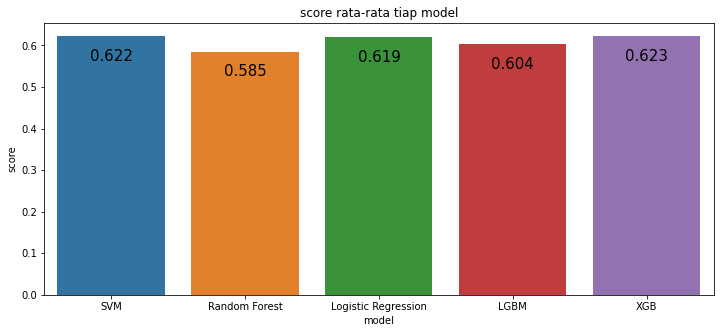

In [17]:
plt.figure(figsize = (12,5))
plots = sns.barplot(x = "model",y = "score",data = df_model,ci = None)
plots.set_title("score rata-rata tiap model")
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, -20),
                   textcoords='offset points') 

dari grafik diatas dapat dilihat bahwa tiap model memiliki rata-rata score CV yang tidak terlalu jauh, karena pemilihan tidak hanya berdasarkan score, tetapi juga memperhatikan kecepatan proses dari model, saya memilih 2 model yang akan saya tuning yakni Logistic Regression dan juga XGBoost karena score kedua model ini tidak terlalu jauh.

# Model Tuning

metode hyperparameter tuning yang akan saya gunakan adalah metode bayesian, karena jumlah parameter dan data yang digunakan dalam kasus ini tidak terlalu besar, sehinnga waktu yang dibutuhkan tidak terlalu lama.

## Logistic Regression

Hyperparameter yang saya tuning di model ini tidaklah banyak, hanya 2 parameter saja, yakni C dan juga intercept.

parameter C di logistic regression merupakan parameter yang mengatur regularisasi dari model. Karena C merupakan nilai invers, maka semakin kecil nilai, maka regularisasi semakin besar. Parameter ini saya tuning dari nilai 0.001 sampai 100.

parameter intercept di logistic regression untuk mengatur apakah model memiliki nilai konstan atau tidak.

In [18]:
#BAYESIAN

pipeline = Pipeline([
    ('prep', preprocessor),
    ('under',under), 
    ('algo', LogisticRegression(random_state = 42))
])

params = {'algo__C': Real(low=0.001, high=100, prior='log-uniform', transform='identity'),
          'algo__fit_intercept': Categorical(categories=(True, False), prior=None)}

model_logreg = BayesSearchCV(pipeline, params, cv=4, scoring="f1", n_iter=50, n_jobs=-1, verbose=0, random_state=42)
model_logreg.fit(X_train, y_train)

print(model_logreg.best_params_)
print(model_logreg.score(X_train, y_train), model_logreg.best_score_, model_logreg.score(X_test, y_test))

OrderedDict([('algo__C', 0.5592357215420848), ('algo__fit_intercept', False)])
0.6272149782681377 0.624389708518934 0.633112582781457


hasil akhir menemukan bahwa parameter yang memiliki score tertinggi adalah C dengan nilai 0.11, dan menggunakan intercept 

In [19]:
print(classification_report(y_test,model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1035
           1       0.63      0.64      0.63       374

    accuracy                           0.80      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



report diatas menunjukan bahwa f1 score untuk 1 sebagai class positif adalah 0.63, dengan recall 0.64 dan precision sebesar 0.63. penjelasan mengenai nilai ini akan dijelaskan di akhir pemilihan model

## XGBoost

berbeda dengan Logistic regression, XGBosst memiiki parameter yang banyak untuk di tuning, disini ada 6 parameter yang akan dituning, antara lain gamma,learning rate, max depth, n_estimator, regularisasi L1 dan L2.

learning rate pada XGBoost berguna untuk mengatur seberapa cepat model akan belajar. parameter ini memiliki pasangan dengan n_estimator. Semakin besar learning rate, maka modela akan semakin untuk belajar

n_estimator berfungsi untuk mengatur seberapa banyak model akan belajar. parameter ini berkebalikan dengan learning rate. Semakin besar n_estimator, maka learning rate sering kali di set menjadi kecil, dan sebaliknya.

max_depth berguna untuk mengatur seberapa dalam pohon dalam xgboost akan dibentuk. semakin besarnya nilainya, biasanya model akan semakin overfit.

sedangkan untuk gamma,L1 dan L2, berguna untuk regularisasi, semakin besar nilainya , maka regularisasi akan semakin besar, parameter ini berguna untuk mengatasi overfitting pada model.    



In [20]:
#BAYESIAN 
pipeline = Pipeline([
    ('prep', preprocessor), 
    ('under',under), 
    ('algo', XGBClassifier(random_state = 42,n_jobs = -1 ))
])

params = { 
 'algo__gamma': Integer(low=1, high=10, prior='uniform', transform='identity'),
 'algo__learning_rate': Real(low=0.01, high=1, prior='log-uniform', transform='identity'),
 'algo__max_depth': Integer(low=1, high=10, prior='uniform', transform='identity'),
 'algo__n_estimators': Integer(low=100, high=300, prior='uniform', transform='identity'),
 'algo__reg_alpha': Real(low=0.001, high=10, prior='log-uniform', transform='identity'),
 'algo__reg_lambda': Real(low=0.001, high=10, prior='log-uniform', transform='identity'),
 }

model_xgb = BayesSearchCV(pipeline, params, cv=4, scoring="f1", n_iter=50, n_jobs=-1, verbose=0, random_state=42)
model_xgb.fit(X_train, y_train)

print(model_xgb.best_params_)
print(model_xgb.score(X_train, y_train), model_xgb.best_score_, model_xgb.score(X_test, y_test))

OrderedDict([('algo__gamma', 1), ('algo__learning_rate', 0.20890852590316908), ('algo__max_depth', 1), ('algo__n_estimators', 100), ('algo__reg_alpha', 0.001), ('algo__reg_lambda', 0.4866011495176174)])
0.6382978723404256 0.6276146133371352 0.6329442282749675


In [21]:
print(classification_report(y_test,model_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.61      0.65      0.63       374

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



report diatas menunjukan bahwa f1 score untuk 1 sebagai class positif adalah 0.63, dengan recall 0.65 dan precision sebesar 0.61. penjelasan mengenai nilai ini akan dijelaskan di akhir pemilihan model

# Confusion Matrix

untuk menjelaskan mengenai score yang telah diperoleh tadi, lebih mudahnya denga menggunakan confusion matrix, confusion matrix memberikan jumlah data yang false positif,true positif,false negatif dan true negatif.

model yang saya gunakan untuk confusion matrix adalah Logistic Regression

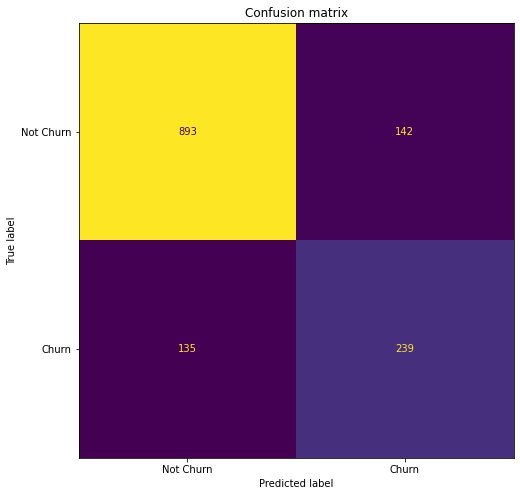

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Confusion matrix")
cm = confusion_matrix(y_test, model_logreg.predict(X_test), labels=model_logreg.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Churn","Churn"])
disp.plot(ax = ax,colorbar=False);

dari confusion matrix diatas dapat dilihat angka yang menunjukan seberapa banyak model kita benar memprediksi dan salah memprediksi

dapat dilihat bahwa angka 135 menunjukan bahwa model kita memprediksi pelanggan tersebut tidaklah Churn, tetapi sebenarnya pelanggan tersebut adalah Churn, kasus ini dinamakan dengan False Negatif. Sedangkan 142 pelanggan kita diprediksi akan Churn tetapi sebenarnya pelanggan kita tidak Churn, kasus ini dinamakan False Positif.

dengan kata lain, model kita berhasil memprediksi benar bahwa pelanggan tersebut Churn sebanyak 239 dari 374 pelanggan yang Churn atau nilai recall model 0.639. Model kita juga berhasil memprediksi benar bahwa pelanggan tersebut tidaklah Churn sebanyak 893 dari 1035 pelanggan yang tidak Churn atau nilai specificity model adalah adalah 0.86

sebenarnya kita bisa memfokuskan model mengurangi kesalahan alse Positif ataupun False negatif, di tiap perusahaan memiliki ketentuan masing masing, namun karena saya memakai f1 score, oleh karena itu model cenderung menyeimbangkan kesalahan untuk False positif dan False negatif.

# Save Model

In [23]:
with open("model.pkl","wb") as f:
    pickle.dump(model_logreg,f)

# Model Deployment

setelah membuat model, dan dirasa model ini sudah cocok. Langkah selanjutnya adalah deployment.

model ini sudah saya deploy dengan alamat API sebagai berikut: https://next-dev-ds.herokuapp.com/ , untuk melakukan prediksi, bisa menggunakan endpoint /predict.



### data yang digunakan untuk prediksi



In [25]:
json_test = {"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":1,"PhoneService":"Yes","MultipleLines":"No","InternetService":"Fiber optic","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"Yes","StreamingMovies":"Yes","Contract":"Month-to-month","PaperlessBilling":"Yes","PaymentMethod":"Electronic check","MonthlyCharges":90.55,"TotalCharges":90.55}
pd.DataFrame([json_test])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.55,90.55


### menggunakan API model

In [26]:
url = 'https://next-dev-ds.herokuapp.com/predict'
req = requests.post(url, json=json_test)
req.json()

{'prediction': 'Churn', 'status': 'success'}

model memprediksi bahwa pelanggan tersebut adalah Churn

# Penutup

walaupun model yang dibuat memiliki Score yang tidak terlalu bagus, setidaknya kita bisa mengetahui bagaimana proses membuat model dari import data sampai dengan model Evaluation.

Sebenarnya ada langkah lain seperti Feature Engineering,yang berguna untuk meningkatkan Score dari model. Tetapi untuk saat ini kita hanya berfokus pada cara menggunakan dan memilih model yang akan dipakai saja 

Sekian dari saya apabila ada kesalahan saya mohon maaf, Terimakasih